# Library Calls

In [1]:
import pandas as pd
import numpy as np
import feather

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve

from imblearn.over_sampling import ADASYN 

import matplotlib.pyplot as plt

# Random State
np.random.seed(5590)

# Data Import

In [2]:
df_structured = feather.read_dataframe('./data/df_structured_export.feather')

# Processing

Quick check for admissions_readmit dataframe.

In [3]:
df_structured.head().T

,0,1,2,3,4
hadm_id,165315,152223,124321,161859,129635
subject_id,00022,00023,00023,00024,00025
readmit_30,0,0,0,0,0
age_yr,65,71.2,75.3,39,59
length_stay_hr_log,4.78136,7.0433,7.34341,6.10014,6.40599
icu_stay,1,1,1,1,1
albumin_test,0,0,1,0,1
albumin_flag,0,0,0,0,1
calcium_test,1,1,1,1,1
calcium_flag,0,1,1,0,1


In [4]:
df_structured.shape

(43875, 47)

In [5]:
# NAs
df_structured.isna().sum().sum()

0

In [6]:
# Drop Ids
df_structured.drop(columns = ['hadm_id', 'subject_id'], inplace = True)

In [7]:
df_structured.head().T

,0,1,2,3,4
readmit_30,0.000000,0.000000,0.000000,0.000000,0.000000
age_yr,65.000000,71.200000,75.300000,39.000000,59.000000
length_stay_hr_log,4.781360,7.043301,7.343408,6.100137,6.405992
icu_stay,1.000000,1.000000,1.000000,1.000000,1.000000
albumin_test,0.000000,0.000000,1.000000,0.000000,1.000000
albumin_flag,0.000000,0.000000,0.000000,0.000000,1.000000
calcium_test,1.000000,1.000000,1.000000,1.000000,1.000000
calcium_flag,0.000000,1.000000,1.000000,0.000000,1.000000
magnesium_test,1.000000,1.000000,1.000000,1.000000,1.000000
magnesium_flag,0.000000,0.000000,0.000000,0.000000,0.000000


# Functions

## Processing

In [8]:
def processing_adasyn(df):
   
    # Split into Train, Valid and Test
    ## Shuffle
    df = df.sample(n = len(df))
    df = df.reset_index(drop = True)
    
    ## Extract Data for Test and Valid Sampling
    df_valid_test = df.sample(frac=0.40)
    
    ## Test Sample
    df_test = df_valid_test.sample(frac = 0.5)
    
    ## Valid Sample
    df_valid = df_valid_test.drop(df_test.index)

    ## Training Sample
    df_train = df.drop(df_valid_test.index)
    

    # Define Predictors
    x_train = df_train.drop(columns = ['readmit_30'])
    x_valid = df_valid.drop(columns = ['readmit_30'])
    x_test  = df_test.drop(columns = ['readmit_30'])

    # Define Target Variables Pre-ADASYN
    y_train = df_train.readmit_30
    y_valid = df_valid.readmit_30
    y_test  = df_test.readmit_30
    
    #Initialize ADASYN 
    sm = ADASYN()
    
    # Transform Training Data Via ADASYN
    x_train_adasym, y_train_adasym = sm.fit_sample(x_train, y_train)
    
    return x_train_adasym, x_valid, x_test, y_train_adasym, y_valid, y_test

## Scoring Metrics

In [9]:
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)

## Scoring Output

In [10]:
def model_output(y_train, y_train_preds, y_valid, y_valid_preds):
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
    fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)

    thresh = 0.5

    auc_t = '%.3f' %roc_auc_score(y_train, y_train_preds)
    auc_v = '%.3f' %roc_auc_score(y_valid, y_valid_preds)
    
    acc_t = '%.3f' %calc_accuracy(y_train, y_train_preds, thresh)
    acc_v = '%.3f' %calc_accuracy(y_valid, y_valid_preds, thresh)
    
    recall_raw_t = calc_recall(y_train, y_train_preds, thresh)
    recall_raw_v = calc_precision(y_valid, y_valid_preds, thresh)
    
    recall_t = '%.3f' %recall_raw_t
    recall_v = '%.3f' %recall_raw_v
    
    precision_raw_t = calc_precision(y_train, y_train_preds, thresh)
    precision_raw_v = calc_precision(y_valid, y_valid_preds, thresh)
    
    precision_t = '%.3f' %precision_raw_t
    precision_v = '%.3f' %precision_raw_v
      
    
    f1_t = '%.3f' %((precision_raw_t * recall_raw_t)/(precision_raw_t + recall_raw_t))
    f1_v = '%.3f' %((precision_raw_v * recall_raw_v)/(precision_raw_v + recall_raw_v))
    
    specificity_t = '%.3f' %calc_specificity(y_train, y_train_preds, thresh)
    specificity_v = '%.3f' %calc_specificity(y_valid, y_valid_preds, thresh)
    
    prevalence_t = '%.3f' %calc_prevalence(y_train)
    prevalence_v = '%.3f' %calc_prevalence(y_valid)
    
    
    data = {'Score':['AUC', 'Accuracy', 'Recall', 'Precision', 'F1', 'Specificity', 'Prevalence'],
            'Train':[auc_t, acc_t, recall_t, precision_t, f1_t, specificity_t, prevalence_t],
            'Validation':[auc_v, acc_v, recall_v, precision_v, f1_v, specificity_v, prevalence_v]
           }
    
    df = pd.DataFrame(data)
    
    print(df)

    plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%roc_auc_score(y_train, y_train_preds))
    plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%roc_auc_score(y_valid, y_valid_preds))
    plt.plot([0,1],[0,1],'-k')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

## Modeling Execution

In [11]:
def train_model_w_output(clf):
    
    clf.fit(x_train, y_train)

    y_train_preds = clf.predict_proba(x_train)[:,1]
    y_valid_preds = clf.predict_proba(x_valid)[:,1]

    model_output(y_train, y_train_preds, y_valid, y_valid_preds)

# Data Set: Structured
The following analysis will be of the structured data set.

## Data Processing
First the data is processed into training, valid, and test data. This may take a while.

In [12]:
df = df_structured.sample(frac = 0.50)
x_train, x_valid, x_test, y_train, y_valid, y_test = processing_adasyn(df)

## Modeling - Default Settings

### Naive Bayes

         Score  Train Validation
0          AUC  0.598      0.576
1     Accuracy  0.566      0.678
2       Recall  0.439      0.051
3    Precision  0.589      0.051
4           F1  0.251      0.025
5  Specificity  0.694      0.689
6   Prevalence  0.500      0.040


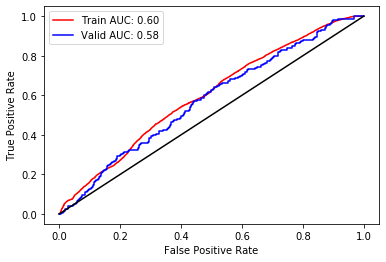

In [13]:
clf = MultinomialNB()
train_model_w_output(clf)

### Logistic Regression

         Score  Train Validation
0          AUC  0.699      0.624
1     Accuracy  0.651      0.594
2       Recall  0.698      0.056
3    Precision  0.638      0.056
4           F1  0.333      0.028
5  Specificity  0.604      0.594
6   Prevalence  0.500      0.040


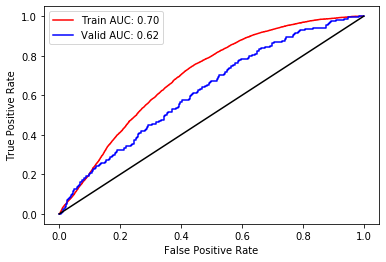

In [14]:
clf = LogisticRegression(solver = 'liblinear')
train_model_w_output(clf)

### Random Forest

         Score  Train Validation
0          AUC  1.000      0.577
1     Accuracy  1.000      0.959
2       Recall  1.000      0.125
3    Precision  1.000      0.125
4           F1  0.500      0.062
5  Specificity  1.000      0.998
6   Prevalence  0.500      0.040


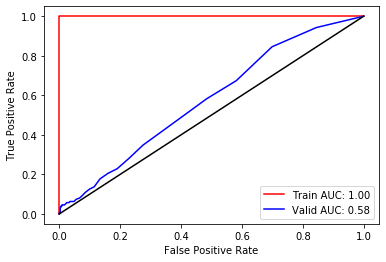

In [16]:
clf = RandomForestClassifier(n_estimators = 100)
train_model_w_output(clf)

### SVM

####  Linear Kernel

In [ ]:
# clf = SVC(C=1.0, kernel='linear', gamma = 'auto', verbose = 1, probability=True)
# train_model_w_output(clf)

### Gradient Boost Classifier

C:\Users\canfi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


         Score  Train Validation
0          AUC  0.987      0.626
1     Accuracy  0.969      0.960
2       Recall  0.938        nan
3    Precision  1.000        nan
4           F1  0.484        nan
5  Specificity  1.000      1.000
6   Prevalence  0.500      0.040


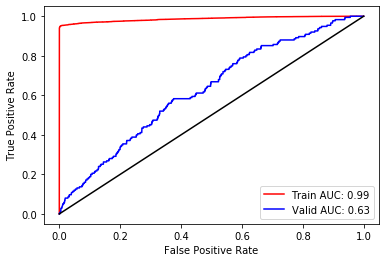

In [17]:
clf = GradientBoostingClassifier()
train_model_w_output(clf)

### Ada Boost Classifier

         Score  Train Validation
0          AUC  0.982      0.598
1     Accuracy  0.957      0.955
2       Recall  0.920      0.038
3    Precision  0.994      0.038
4           F1  0.478      0.019
5  Specificity  0.994      0.994
6   Prevalence  0.500      0.040


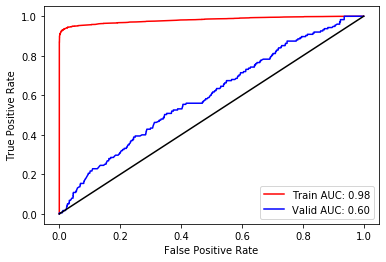

In [18]:
clf = AdaBoostClassifier()
train_model_w_output(clf)

### XGBoost

In [ ]:
# clf = XGBClassifier()
# train_model_w_output(clf)

## Parameter Optimization

### Naive Bayes

In [19]:
# Establish Classifier
clf = MultinomialNB()

#Define Parameters
alpha = np.logspace(-10, 10, 21)

# Create hyperparameter options
hyperparameters = dict(alpha = alpha)

# Create a Grid Search
clf_grid = GridSearchCV(clf, hyperparameters, cv=5, verbose=1,  scoring = 'f1_macro', n_jobs = -1)

# Best Model
opt_model = clf_grid.fit(x_train, y_train)

alpha_opt = opt_model.best_estimator_.get_params()['alpha']

# print('Optimal Alpha:', alpha_opt)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  90 out of 105 | elapsed:    2.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    2.7s finished


         Score  Train Validation
0          AUC  0.592      0.573
1     Accuracy  0.566      0.670
2       Recall  0.447      0.049
3    Precision  0.586      0.049
4           F1  0.254      0.024
5  Specificity  0.685      0.681
6   Prevalence  0.500      0.040


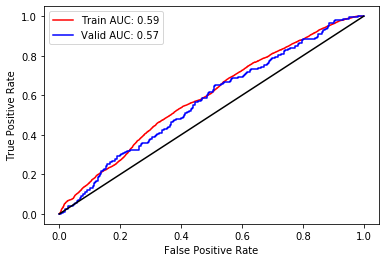

In [20]:
clf = MultinomialNB(alpha = alpha_opt)
train_model_w_output(clf)

### Logistic Regression 

In [ ]:
# Establish Classifier
clf = LogisticRegression()

#Define Parameters
penalty = ['l1','l2']        # From Previous Runs it's always L2
C = np.logspace(-5, 10, 16)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create a Grid Search
clf_grid = GridSearchCV(clf, hyperparameters, cv=5, verbose=1,  scoring = 'recall', n_jobs = -1)

# Best Model
opt_model = clf_grid.fit(x_train, y_train)

C_opt = opt_model.best_estimator_.get_params()['C']
penalty_opt = opt_model.best_estimator_.get_params()['penalty']

print('Optimal Penalty:', penalty_opt)
print('Optimal C:', C_opt)

In [ ]:
clf = LogisticRegression(penalty = penalty_opt, C = C_opt)
train_model_w_output(clf)

## Random Forest

In [ ]:
# Establish Classifier
clf = RandomForestClassifier()

# Create hyperparameter options
hyperparameters = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Grid Search
clf_grid = GridSearchCV(clf, hyperparameters, cv=5, verbose=1,  scoring = 'recall', n_jobs = -1)

# Best Model
opt_model = clf_grid.fit(x_train, y_train)

max_features_opt = opt_model.best_estimator_.get_params()['max_features']
n_estimators_opt = opt_model.best_estimator_.get_params()['n_estimators']

print('Optimal Estimators:', n_estimators_opt)
print('Optimal Max Features:', max_features_opt)

In [ ]:
clf = RandomForestClassifier(max_features = max_features_opt, n_estimators = n_estimators_opt)
train_model_w_output(clf)

### ADA Boost

In [ ]:
# Establish Classifier
clf = AdaBoostClassifier()

#Define Parameters
n_estimators = [25, 50, 100]
learning_rate = np.logspace(-4, -1, 4)

# Create hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate)

# Create a Grid Search
n_iter_search = 5
clf_grid = RandomizedSearchCV(clf, hyperparameters, n_iter = n_iter_search,
                              verbose=1, cv=5, scoring = 'recall', n_jobs = -1)

# Best Model
opt_model = clf_grid.fit(x_train, y_train)

n_estimators_opt = opt_model.best_estimator_.get_params()['n_estimators']
learning_rate_opt = opt_model.best_estimator_.get_params()['learning_rate']

print('Optimal Estimators:', n_estimators_opt)
print('Optimal Learning Rate:', learning_rate_opt)

In [ ]:
clf = AdaBoostClassifier(n_estimators = n_estimators_opt, learning_rate = learning_rate_opt)
train_model_w_output(clf)